In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


In [2]:
digits = load_digits()

In [3]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
print(len(digits.images))

1797


In [5]:
images_and_labels = list(zip(digits.images, digits.target))

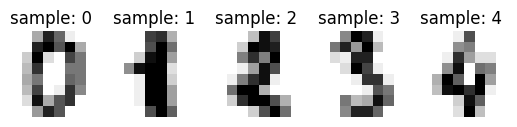

In [12]:
for index, (image, label) in enumerate(images_and_labels[:5]):
  plt.subplot(2, 5, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('sample: %i ' % label)

In [14]:
for i in range(5):
  print(i, digits.target[i])

0 0
1 1
2 2
3 3
4 4


In [15]:
X = digits.data
Y = digits.target

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

In [28]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [29]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

<ipython-input-29-ec09ccdb9262>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
<ipython-input-29-ec09ccdb9262>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.int64)


In [30]:
loss_fn = nn.CrossEntropyLoss()

In [31]:
optimizer = optim.Adam(model.parameters())

In [32]:
losses = []

In [33]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())

Epoch    0/100 Cost: 2.676869
Epoch   10/100 Cost: 2.088297
Epoch   20/100 Cost: 1.792338
Epoch   30/100 Cost: 1.444816
Epoch   40/100 Cost: 1.083662
Epoch   50/100 Cost: 0.780825
Epoch   60/100 Cost: 0.568421
Epoch   70/100 Cost: 0.423981
Epoch   80/100 Cost: 0.325246
Epoch   90/100 Cost: 0.257142


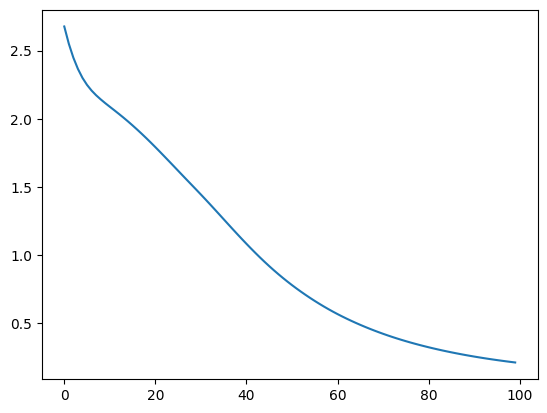

In [34]:
plt.plot(losses)